### 데이터 처리
원핫인코딩

In [4]:
import pandas as pd

# 기존 데이터 로드
df = pd.read_csv("./전처리/AR_CAR+라벨+시가총액+관심도+상승여부.csv")

# 라벨 1~3에서 모든 고유 라벨 항목 추출
unique_label_1 = df['라벨 1'].dropna().unique().tolist()
unique_label_2 = df['라벨 2'].dropna().unique().tolist()
unique_label_3 = df['라벨 3'].dropna().unique().tolist()

# 전체 유니크 라벨 목록 정리
all_labels = list(set(unique_label_1 + unique_label_2 + unique_label_3))

# 각 라벨에 대해 1/0 인코딩 열 생성
for label in all_labels:
    df[label] = df[['라벨 1', '라벨 2', '라벨 3']].apply(lambda row: int(label in row.values), axis=1)

# 저장할 파일 이름
output_filename = "Final.csv"

# CSV로 저장 (인코딩은 Excel 호환 위해 cp949 또는 utf-8-sig 권장)
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"✅ 저장 완료: {output_filename}")


✅ 저장 완료: Final.csv


In [2]:
len(df)

326

In [3]:
df.isna().sum()

Unnamed: 0            0
소속사                   0
연예인 이름                0
사건 날짜                 0
AR1                   0
AR2                   0
그룹                  143
사건 내용                 0
라벨 1                 73
라벨 2                199
라벨 3                274
사건 날짜(매핑된 주가 날짜)      0
CAR(1,2)              0
시가총액                  0
년월                    0
관심도                   0
log_시가총액              0
시가총액_랭크               0
stock_trend_n10      25
사생활                   0
사회적 감수성               0
종교/이념                 0
범죄 혐의                 0
발언 문제                 0
혐의정보 유포               0
세금 문제                 0
무혐의                   0
팬 대응                  0
무의식적 태도               0
병역 문제                 0
기타                    0
성 관련                  0
dtype: int64

모든 라벨 열에 대해 nan값인 행 드랍

In [5]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("Final.csv")

# 라벨 열 목록
label_columns = ['라벨 1', '라벨 2', '라벨 3']

# 라벨 열이 모두 NaN인 행만 제거
df_cleaned = df[~df[label_columns].isnull().all(axis=1)]

# 결과 저장
df_cleaned.to_csv("Final_라벨결측제거.csv", index=False, encoding="utf-8-sig")
print("✅ 저장 완료: inal_라벨결측제거.csv")


✅ 저장 완료: inal_라벨결측제거.csv


In [6]:
len(df_cleaned)

253

In [7]:
len(df) - len(df_cleaned)

73

In [8]:
import pandas as pd

# 기존 데이터 로드
df = pd.read_csv("Final_라벨결측제거.csv")

# 라벨 1~3에서 모든 고유 라벨 항목 추출
unique_label_1 = df['라벨 1'].dropna().unique().tolist()
unique_label_2 = df['라벨 2'].dropna().unique().tolist()
unique_label_3 = df['라벨 3'].dropna().unique().tolist()

# 전체 유니크 라벨 목록 정리
all_labels = list(set(unique_label_1 + unique_label_2 + unique_label_3))

# 각 라벨에 대해 1/0 인코딩 열 생성
for label in all_labels:
    df[label] = df[['라벨 1', '라벨 2', '라벨 3']].apply(lambda row: int(label in row.values), axis=1)

# 저장할 파일 이름
output_filename = "Final_라벨결측제거_원핫인코딩.csv"

# CSV로 저장 (인코딩은 Excel 호환 위해 cp949 또는 utf-8-sig 권장)
df.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"✅ 저장 완료: {output_filename}")

✅ 저장 완료: Final_라벨결측제거_원핫인코딩.csv


In [9]:
df.isna().sum()

Unnamed: 0            0
소속사                   0
연예인 이름                0
사건 날짜                 0
AR1                   0
AR2                   0
그룹                  104
사건 내용                 0
라벨 1                  0
라벨 2                126
라벨 3                201
사건 날짜(매핑된 주가 날짜)      0
CAR(1,2)              0
시가총액                  0
년월                    0
관심도                   0
log_시가총액              0
시가총액_랭크               0
stock_trend_n10      14
사생활                   0
사회적 감수성               0
종교/이념                 0
범죄 혐의                 0
발언 문제                 0
혐의정보 유포               0
세금 문제                 0
무혐의                   0
팬 대응                  0
무의식적 태도               0
병역 문제                 0
기타                    0
성 관련                  0
dtype: int64

In [19]:
import pandas as pd
df = pd.read_csv("./전처리/AR_CAR+라벨.csv")

In [20]:
len(df)

326

In [18]:
# 1. '사건 내용' 열에서 중복값이 있는 항목 찾기
duplicated_events = df['사건 내용'][df['사건 내용'].duplicated(keep=False)]

# 2. 중복된 사건 내용만 필터링
duplicated_rows = df[df['사건 내용'].isin(duplicated_events)]

# 결과 확인
duplicated_rows


,소속사,연예인 이름,사건 날짜,AR1,AR2,그룹,사건 내용,라벨 1,라벨 2,라벨 3,사건 날짜(매핑된 주가 날짜),"CAR(1,2)"
19,JYP,나연,2019-12-09,-0.000732,0.003883,트와이스,"2019년 12월 9일에 이 남성은 다시 한국에 입국하였고, 이를 인지한 JYP 측...",NaN,NaN,NaN,2019-12-09,0.003151
20,JYP,나연,2019-12-09,-0.000732,0.003883,트와이스,2019년 12월 9일) 최근 SNS 및 커뮤니티등을 통해 알려진 스토킹으로 추정되...,팬 대응,NaN,NaN,2019-12-09,0.003151
21,JYP,나연,2019-12-09,-0.000732,0.003883,트와이스,"2019년 12월 9일에 이 남성은 다시 한국에 입국하였고, 이를 인지한 JYP 측...",NaN,NaN,NaN,2019-12-09,0.003151
22,JYP,나연,2019-12-09,-0.000732,0.003883,트와이스,2019년 12월 9일) 최근 SNS 및 커뮤니티등을 통해 알려진 스토킹으로 추정되...,팬 대응,NaN,NaN,2019-12-09,0.003151
23,JYP,나연,2019-12-09,-0.000732,0.003883,트와이스,"2019년 12월 9일에 이 남성은 다시 한국에 입국하였고, 이를 인지한 JYP 측...",NaN,NaN,NaN,2019-12-09,0.003151
...,...,...,...,...,...,...,...,...,...,...,...,...
308,키이스트,구하라,2019-11-24,-0.229471,-0.339835,NaN,2019년 11월 24일 오후 6시 9분에 서울특별시 강남구 청담동 자택 1층에서 ...,무혐의,NaN,NaN,2019-11-25,-0.569306
310,키이스트,구하라,2019-11-24,-0.229471,-0.339835,NaN,2019년 11월 24일에 구하라가 사망 하면서 최종범도 다시 실검에 오르는 등 이...,무혐의,NaN,NaN,2019-11-25,-0.569306
311,키이스트,구하라,2019-11-24,-0.229471,-0.339835,NaN,2019년 11월 24일 오후 6시 9분에 서울특별시 강남구 청담동 자택 1층에서 ...,무혐의,NaN,NaN,2019-11-25,-0.569306
312,키이스트,구하라,2019-11-24,-0.229471,-0.339835,NaN,2019년 11월 24일에 구하라가 사망 하면서 최종범도 다시 실검에 오르는 등 이...,무혐의,NaN,NaN,2019-11-25,-0.569306


In [87]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '소속사', '연예인 이름', '사건 날짜',
       'AR1', 'AR2', '그룹', '사건 내용', '라벨 1', '라벨 2', '라벨 3', '사건 날짜(매핑된 주가 날짜)',
       'CAR(1,2)', '시가총액', '관심도', 'log_시가총액', '시가총액_랭크', 'stock_trend_n10',
       '사생활', '사회적 감수성', '종교/이념', '범죄 혐의', '발언 문제', '혐의정보 유포', '세금 문제', '무혐의',
       '팬 대응', '무의식적 태도', '병역 문제', '기타', '성 관련', '직업', '직업_배우', '직업_아이돌',
       '거래량 변화율', '관심도_스케일링'],
      dtype='object')

### 3. XGboost

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### (1) 모든 변수 전부 넣어서

In [61]:
df = pd.read_csv('./전처리/Final_라벨결측제거_원핫인코딩_직업.csv')

In [62]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', '소속사', '연예인 이름', '사건 날짜',
       'AR1', 'AR2', '그룹', '사건 내용', '라벨 1', '라벨 2', '라벨 3', '사건 날짜(매핑된 주가 날짜)',
       'CAR(1,2)', '시가총액', '관심도', 'log_시가총액', '시가총액_랭크', 'stock_trend_n10',
       '사생활', '사회적 감수성', '종교/이념', '범죄 혐의', '발언 문제', '혐의정보 유포', '세금 문제', '무혐의',
       '팬 대응', '무의식적 태도', '병역 문제', '기타', '성 관련', '직업', '직업_배우', '직업_아이돌',
       '거래량 변화율', '관심도_스케일링'],
      dtype='object')

📊 XGBoost Regression Evaluation
 - RMSE: 0.0995
 - MAE : 0.0422
 - R^2 : 0.6487
 - Adj R² : 0.4104


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\4102194185.py:79: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


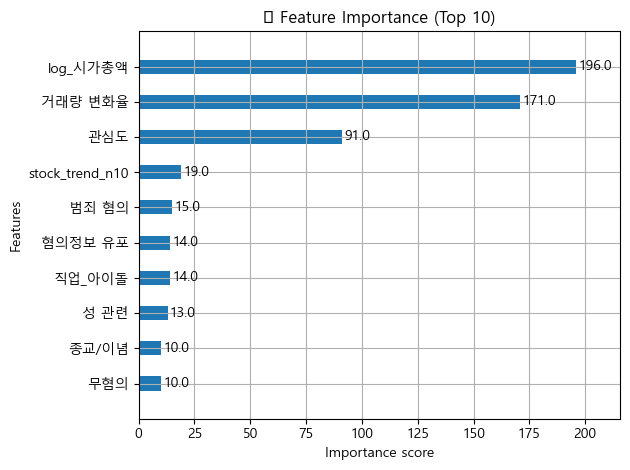

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: Windows에서는 'Malgun Gothic', Mac에서는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 데이터 로딩
df = pd.read_csv("./전처리/Final_라벨결측제거_원핫인코딩_직업.csv")

# 2. 변수 선택
basic_features = ['log_시가총액', 
                  '관심도', 'stock_trend_n10', 
                  '거래량 변화율',
                  '직업_아이돌', '직업_배우'
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 3. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 4. 스케일링 (XGBoost는 스케일링 없어도 되지만 여기선 동일한 조건으로 유지)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 회귀 모델 정의 및 학습
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# 조정 R² 계산
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 XGBoost Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - Adj R² : {adj_r2:.4f}")

# 7. 중요 변수 시각화 (상위 10개)
xgb.plot_importance(xgb_reg, max_num_features=10, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

In [70]:
print(X_train.dtypes)


log_시가총액           float64
관심도                float64
stock_trend_n10    float64
거래량 변화율            float64
직업_아이돌                bool
직업_배우                 bool
기타                   int64
범죄 혐의                int64
무혐의                  int64
팬 대응                 int64
사생활                  int64
혐의정보 유포              int64
성 관련                 int64
사회적 감수성              int64
발언 문제                int64
종교/이념                int64
병역 문제                int64
무의식적 태도              int64
세금 문제                int64
dtype: object


In [71]:
print(X_train.applymap(type).nunique())


log_시가총액           1
관심도                1
stock_trend_n10    1
거래량 변화율            1
직업_아이돌             1
직업_배우              1
기타                 1
범죄 혐의              1
무혐의                1
팬 대응               1
사생활                1
혐의정보 유포            1
성 관련               1
사회적 감수성            1
발언 문제              1
종교/이념              1
병역 문제              1
무의식적 태도            1
세금 문제              1
dtype: int64


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\2063744388.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(type).nunique())


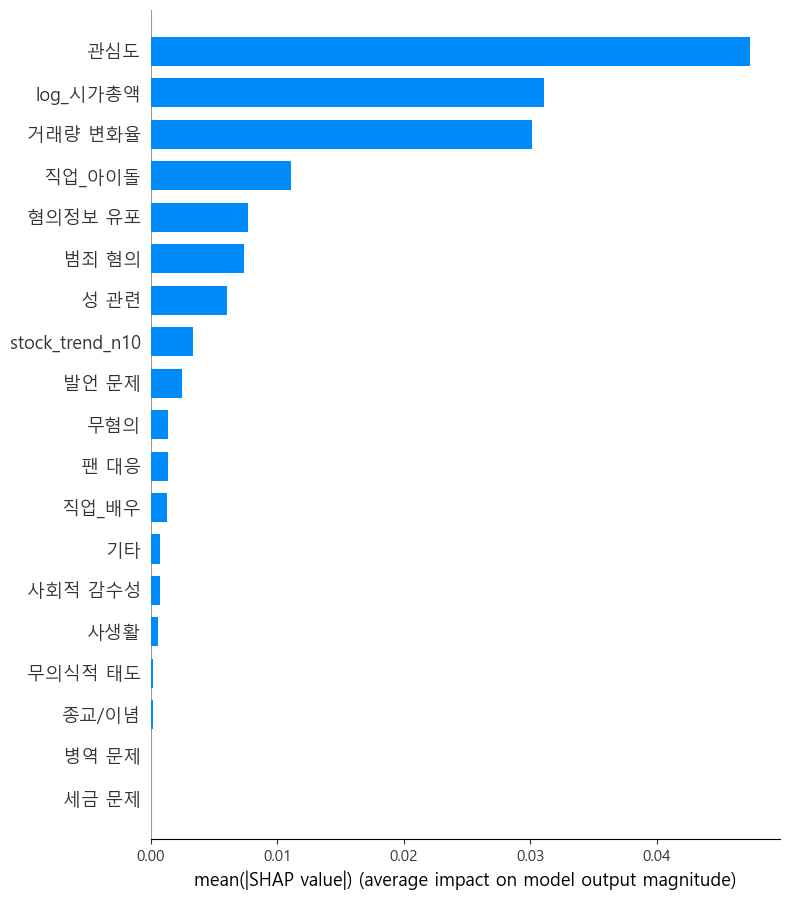

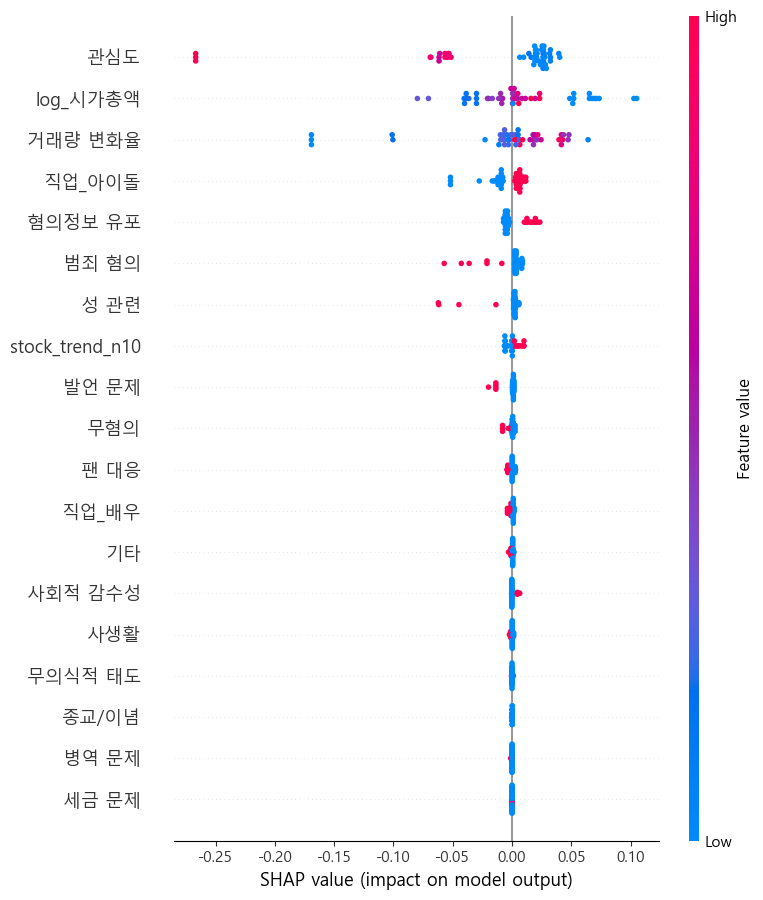

c:\Users\chica\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


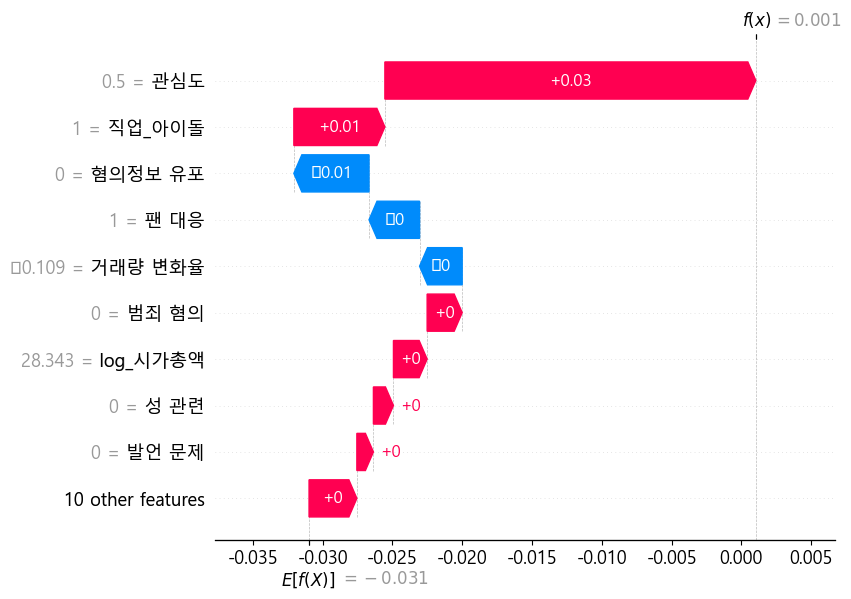

In [72]:
import shap

# 1. SHAP explainer 정의
X_train = X_train.astype(float)
X_test = X_test.astype(float)
explainer = shap.Explainer(xgb_reg, X_train)

# 2. SHAP 값 계산
shap_values = explainer(X_test)

# 3. 요약 그래프 (전체 피처 중요도)
shap.summary_plot(shap_values, X_test, plot_type="bar")  # bar chart
shap.summary_plot(shap_values, X_test)                   # dot plot

# 4. 개별 예측 해석 예시 (1건)
shap.plots.waterfall(shap_values[0])

In [73]:
import statsmodels.api as sm  # ← 이 줄 추가
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = X.astype(float)

# VIF 계산을 위해 상수항 추가
X_with_const = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['변수'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_df)

                 변수         VIF
0          log_시가총액    2.315895
1               관심도    1.637713
2   stock_trend_n10    1.290262
3           거래량 변화율    1.056876
4            직업_아이돌  714.084041
5             직업_배우  393.602149
6                기타    1.522230
7             범죄 혐의    1.352751
8               무혐의    1.559430
9              팬 대응    1.255985
10              사생활    1.460562
11          혐의정보 유포    1.260537
12             성 관련    1.197828
13          사회적 감수성    1.465284
14            발언 문제    1.798699
15            종교/이념    1.107677
16            병역 문제    1.155229
17          무의식적 태도    1.649353
18            세금 문제    1.350161


직업에 대한 VIF가 너무 커서 배제하기로 선택

### (2) 직업 제외 - 이 모델로 확정

📊 XGBoost Regression Evaluation
 - RMSE: 0.0976
 - MAE : 0.0399
 - R^2 : 0.6623
 - Adj R² : 0.4710


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\126153106.py:78: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


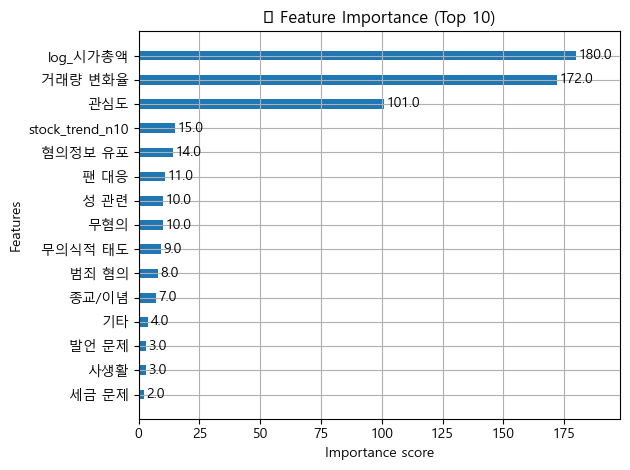

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: Windows에서는 'Malgun Gothic', Mac에서는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 데이터 로딩
df = pd.read_csv("./전처리/Final_라벨결측제거_원핫인코딩_직업.csv")

# 2. 변수 선택
basic_features = ['log_시가총액', 
                  '관심도', 'stock_trend_n10', 
                  '거래량 변화율',
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 3. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 4. 스케일링 (XGBoost는 스케일링 없어도 되지만 여기선 동일한 조건으로 유지)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 회귀 모델 정의 및 학습
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# 조정 R² 계산
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 XGBoost Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - Adj R² : {adj_r2:.4f}")

# 7. 중요 변수 시각화 (상위 10개)
xgb.plot_importance(xgb_reg, max_num_features=15, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

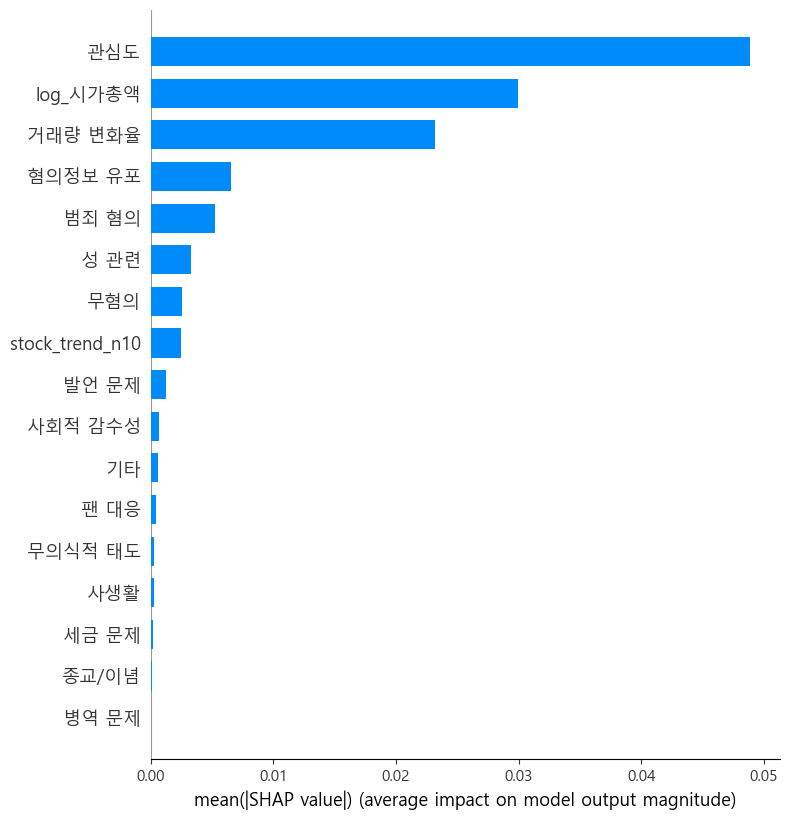

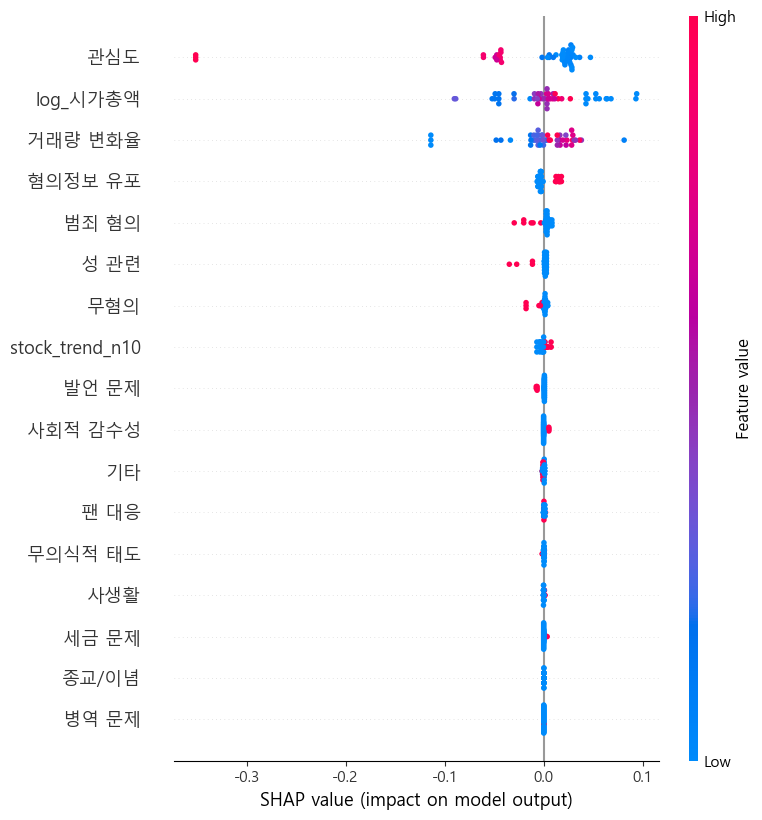

c:\Users\chica\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


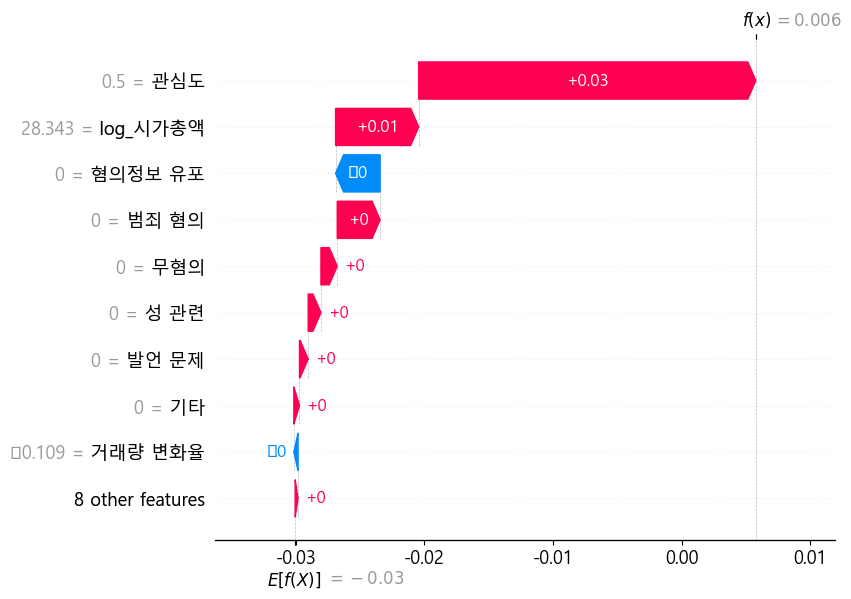

In [82]:
import shap

# 1. SHAP explainer 정의 (자동으로 TreeExplainer 사용됨)
explainer = shap.Explainer(xgb_reg, X_train)

# 2. SHAP 값 계산 (결과는 shap.Explanation 객체)
shap_values = explainer(X_test)

# 3. 전체 피처 중요도 요약 시각화
# (1) 피처 중요도 (bar plot)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# (2) SHAP 값 분포 (dot plot)
shap.summary_plot(shap_values, X_test)

# 4. 개별 예측 해석 예시 (첫 번째 관측치)
shap.plots.waterfall(shap_values[0])

In [83]:
import statsmodels.api as sm  # ← 이 줄 추가
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산을 위해 상수항 추가
X_with_const = sm.add_constant(X)

# VIF 계산
vif_df = pd.DataFrame()
vif_df['변수'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_df)

                 변수       VIF
0          log_시가총액  8.833015
1               관심도  1.547457
2   stock_trend_n10  2.222216
3           거래량 변화율  1.050513
4                기타  2.275618
5             범죄 혐의  1.527221
6               무혐의  1.870201
7              팬 대응  1.382160
8               사생활  1.869502
9           혐의정보 유포  1.581860
10             성 관련  1.263555
11          사회적 감수성  1.512417
12            발언 문제  1.904674
13            종교/이념  1.119268
14            병역 문제  1.216604
15          무의식적 태도  1.822437
16            세금 문제  1.318537


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\2219232717.py:22: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


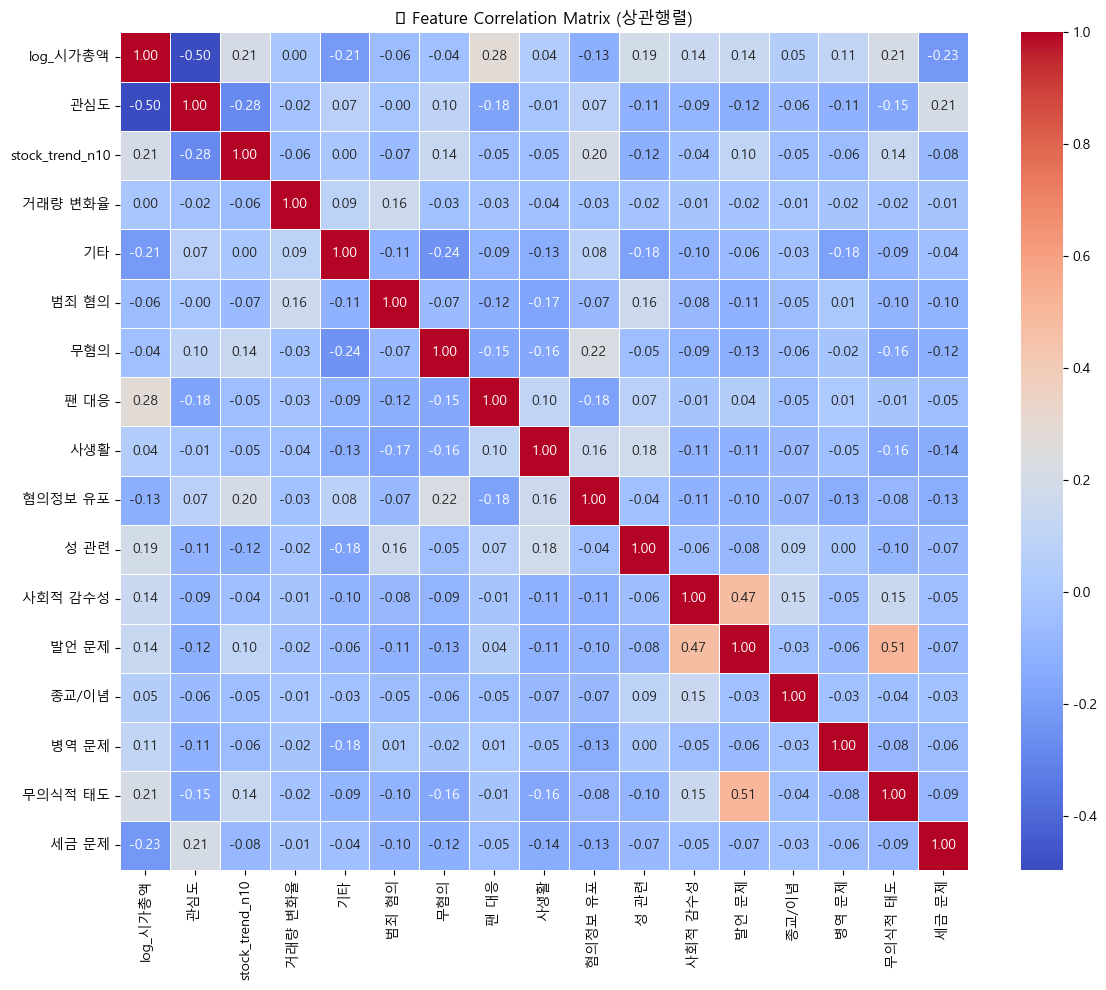

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: 'Malgun Gothic', Mac: 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관행렬 계산
corr_matrix = X.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,        # 각 셀에 숫자 표시
            fmt=".2f", 
            cmap="coolwarm",   # 색상 테마
            linewidths=0.5, 
            cbar=True)

plt.title("📌 Feature Correlation Matrix (상관행렬)")
plt.tight_layout()
plt.show()

K-Fold 기반 XGBoost

- 데이터를 train/test로 나누는 대신, 데이터를 여러 번 나눠가며 평가

- k=5 또는 k=10이면 200행 수준에서도 안정적으로 성능 평가 가능

📊 XGBoost Regression Evaluation (K-Fold CV)
 - RMSE: 0.1058
 - MAE : 0.0491
 - R^2 : 0.5580
 - Adj R² : 0.5240


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\2600173058.py:64: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


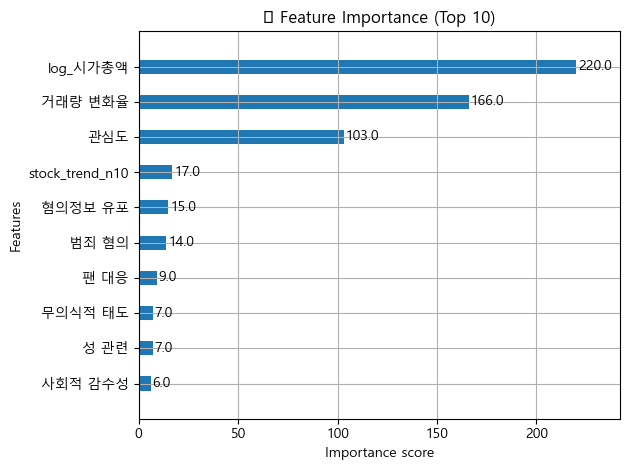

In [90]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로딩
df = pd.read_csv("./전처리/Final_라벨결측제거_원핫인코딩_직업.csv")

# 2. 변수 선택
basic_features = ['log_시가총액', 
                  '관심도', 'stock_trend_n10', 
                  '거래량 변화율',
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 3. 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])
X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 4. 모델 정의
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 5. K-Fold 교차검증
kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(xgb_reg, X, y, cv=kf)

# 6. 평가 지표 계산
rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
mae = mean_absolute_error(y, y_pred_cv)
r2 = r2_score(y, y_pred_cv)
n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 XGBoost Regression Evaluation (K-Fold CV)")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - Adj R² : {adj_r2:.4f}")

# 7. 최종 모델 훈련 후 피처 중요도 시각화
xgb_reg.fit(X, y)
xgb.plot_importance(xgb_reg, max_num_features=10, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()


### (3) 시가 총액, 거래량 변화율 제거

📊 XGBoost Regression Evaluation
 - RMSE: 0.1051
 - MAE : 0.0470
 - R^2 : 0.6083
 - Adj R² : 0.4247


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\889591785.py:78: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


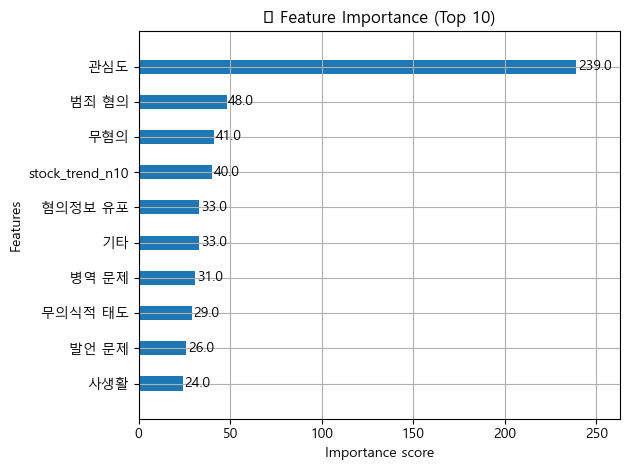

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: Windows에서는 'Malgun Gothic', Mac에서는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. 데이터 로딩
df = pd.read_csv("./전처리/Final_라벨결측제거_원핫인코딩_직업.csv")

# 2. 변수 선택
basic_features = [ 
                  '관심도', 'stock_trend_n10', 
                  #'거래량 변화율',
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])

X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 3. Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 4. 스케일링 (XGBoost는 스케일링 없어도 되지만 여기선 동일한 조건으로 유지)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# 5. XGBoost 회귀 모델 정의 및 학습
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_reg.fit(X_train, y_train)

# 6. 예측 및 평가
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# 조정 R² 계산
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 XGBoost Regression Evaluation")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - Adj R² : {adj_r2:.4f}")

# 7. 중요 변수 시각화 (상위 10개)
xgb.plot_importance(xgb_reg, max_num_features=10, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()

K-Fold 기반 XGBoost

- 데이터를 train/test로 나누는 대신, 데이터를 여러 번 나눠가며 평가

- k=5 또는 k=10이면 200행 수준에서도 안정적으로 성능 평가 가능

📊 XGBoost Regression Evaluation (K-Fold CV)
 - RMSE: 0.0986
 - MAE : 0.0494
 - R^2 : 0.6163
 - Adj R² : 0.5905


C:\Users\chica\AppData\Local\Temp\ipykernel_21828\2022293540.py:65: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


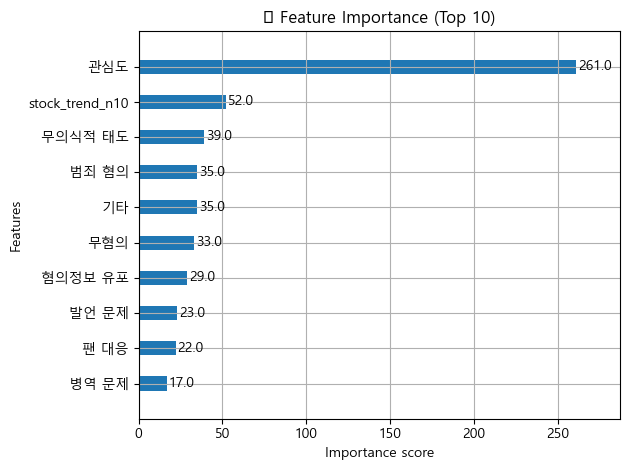

In [97]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로딩
df = pd.read_csv("./전처리/Final_라벨결측제거_원핫인코딩_직업.csv")

# 2. 변수 선택
basic_features = [
                  '관심도',
                  'stock_trend_n10', 
                  
                  ]
label_features = [
    '기타', '범죄 혐의', '무혐의', '팬 대응', '사생활', '혐의정보 유포',
    '성 관련', '사회적 감수성', '발언 문제', '종교/이념', '병역 문제',
    '무의식적 태도', '세금 문제'
]
feature_cols = basic_features + label_features

# 3. 결측치 제거
df_model = df.dropna(subset=feature_cols + ['CAR(1,2)'])
X = df_model[feature_cols]
y = df_model['CAR(1,2)']

# 4. 모델 정의
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# 5. K-Fold 교차검증
kf = KFold(n_splits=5, shuffle=True, random_state=42)
y_pred_cv = cross_val_predict(xgb_reg, X, y, cv=kf)

# 6. 평가 지표 계산
rmse = np.sqrt(mean_squared_error(y, y_pred_cv))
mae = mean_absolute_error(y, y_pred_cv)
r2 = r2_score(y, y_pred_cv)
n = len(y)
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("📊 XGBoost Regression Evaluation (K-Fold CV)")
print(f" - RMSE: {rmse:.4f}")
print(f" - MAE : {mae:.4f}")
print(f" - R^2 : {r2:.4f}")
print(f" - Adj R² : {adj_r2:.4f}")

# 7. 최종 모델 훈련 후 피처 중요도 시각화
xgb_reg.fit(X, y)
xgb.plot_importance(xgb_reg, max_num_features=10, height=0.4)
plt.title("🔍 Feature Importance (Top 10)")
plt.tight_layout()
plt.show()
